# Data gemeenteraadsverkiezingen 2022 Nederland

Dit notebook is voor het verwerken van de data van de gemeenteraadsverkiezingen van 2022. Er zal hier stap voor stap door de data gelopen worden om het proces reproduceerbaar te maken voor latere verkiezingen. De eerste stap was de data ophalen van de bronnen, zowel de overheid als waar is mijn stemlokaal (voor geografische data van de stemlokalen). De bronnen gebruikt voor de data zijn voor de verkiezingen van 2022 is als volgt:

- [Verkiezingsuitslagen Gemeenteraad 2022](https://data.overheid.nl/dataset/verkiezingsuitslagen-gemeenteraad-2022#panel-resources)
  - [Directe link naar uitslagen per gemeente CSV](https://data.overheid.nl/sites/default/files/dataset/08b04bec-3332-4c76-bb0c-68bfaeb5df43/resources/GR2022_osv4-3_2022-03-24T15.33.zip)
  - [Directe link naar kandidatenlijst met uitslagen CSV](https://data.overheid.nl/sites/default/files/dataset/08b04bec-3332-4c76-bb0c-68bfaeb5df43/resources/GR2022_alle-kandidaten_2022-02-22T08.34.csv)
- [Waar is mijn stemlokaal stembureau data](https://waarismijnstemlokaal.nl/data)
  - [Directe link naar waar is mijn stemlokaal gemeenteraad 2022 CSV (CKAN)](https://ckan.dataplatform.nl/datastore/dump/d6a1b4c4-73c8-457b-9b75-a38428bded68)
  - [Verkiezingsuitslagen gemeenteraadsverkiezingen 2022 geodata (Volkskrant)](https://data.openstate.eu/dataset/verkiezingsuitslagen-gemeenteraadsverkiezingen-2022)
    - [Directe link naar GEOJSON bestand](https://data.openstate.eu/dataset/a1767f1b-bf0c-409b-b3b1-3af9954b57f4/resource/413be255-5070-48f4-b631-895097976abb/download/2022gr.geo.json)
- [CBS Wijk- en buurtkaart 2021](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2021)
  - [Directe link naar zip bestand met SHP bestand er in](https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/wijk-en-buurtstatistieken/wijkbuurtkaart_2021_v1.zip)

De eerste stap die we moeten maken is de data importeren voor de analyse, daarna kunnen we kijken hoe goed de data is, hoe we het aan kunnen vullen, en wat er mee te doen. De makkelijkste structuur die we vonden was het geojson bestand van open state en de Volkskrant, daar staan alle stembureaus al in een lijst, en we hebben een makkelijk framework om het te importeren; geopandas. We laden deze dan ook als eerste in.

In [21]:
import pandas as pd
import geopandas as gpd

crs = {'init':'EPSG:4326'}
df_geojson = gpd.read_file(r'../data/2022gr.geo.json', crs=crs)
print(type(df_geojson))
df_geojson

/home/lillian/.local/lib/python3.9/site-packages/fiona/collection.py:208: FeatureWarning: Empty field name at index 61
  self._schema = self.session.get_schema()
/home/lillian/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:600: UserWarning: Empty field name at index 61
  for feature in features_lst:


<class 'geopandas.geodataframe.GeoDataFrame'>


,Stembureau,Adres,Locatie,description,Geldige stemmen,Opgeroepen,Ongeldig,Blanco,Geldige stempassen,Geldige volmachtbewijzen,...,Nationale Bond tegen Overheidszaken - DH,Haags Belang,INL Den Haag,Rosmalens Belang,De Bossche Groenen,"""Leefbaar 's-Hertogenbosch"" Paul Kagie",RAADSGROEPERING ''BOSCH-BELANG'',gewoon ge-DREVEN,VOOR Den Bosch Joep Gersjes,geometry
0,1,9461BH,SB1,Stembureau Gemeentehuis Gieten (postcode: 9461...,784,2780,3,3,700,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (6.75899 53.00524)
1,2,9461DA,SB2,Stembureau OBS Gieten (postcode: 9461 DA),562,1396,0,0,518,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (6.75990 52.99975)
2,3,9461JA,SB3,Stembureau Zorgcentrum Dekelhem (postcode: 946...,566,1409,2,2,516,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (6.76600 53.00494)
3,4,9451KD,SB4,Stembureau Ontmoetingscentrum Boerhorn Rolde (...,1495,2209,2,4,1335,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (6.64736 52.98281)
4,6,9454PL,SB6,Stembureau Dropshuis de Eekhof (postcode: 9454...,347,477,0,2,298,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (6.60459 52.95269)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591,703,5391AR,SB703,Stembureau Stembureau Gemeenschapshuis de Meen...,268,0,0,1,237,32,...,NaN,NaN,NaN,105.0,2.0,6.0,0.0,33.0,0.0,POINT (5.43290 51.72810)
12592,705,5391AR,SB705,Stembureau Stembureau Gemeenschapshuis De Meen...,398,0,1,0,359,40,...,NaN,NaN,NaN,174.0,6.0,2.0,3.0,31.0,2.0,POINT (5.43290 51.72810)
12593,750,5382KE,SB750,Stembureau Stembureau Gemeenschapshuis 't Zijl...,663,2321,2,0,552,113,...,NaN,NaN,NaN,47.0,19.0,53.0,2.0,62.0,5.0,POINT (5.45919 51.70595)
12594,751,5382KE,SB751,Stembureau Stembureau Gemeenschapshuis 't Zijl...,170,0,0,0,151,19,...,NaN,NaN,NaN,8.0,11.0,13.0,1.0,22.0,1.0,POINT (5.45919 51.70595)


We importeren nu de gemeente shapefile kaart van het CBS, om de overlay van onze stemlokalen eroverheen te kunnen doen. 

<AxesSubplot:>

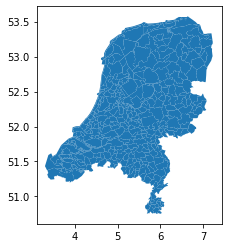

In [22]:
nl_map = gpd.read_file(r'../data/shape/Netherlands_shapefile/gemeente_2021_v1.shp')
nl_map.to_crs(epsg=4326).plot()


<AxesSubplot:>

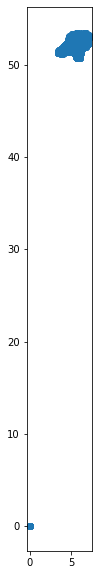

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
nl_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
df_geojson.plot(ax=ax)

In [24]:
df_wims = pd.read_csv(r'../data/wims.csv')
print(df_wims)
dfwims.

SyntaxError: invalid syntax (745234620.py, line 3)

In [ ]:
#de eerste vijf rijen zijn meta-data en kunnen we gerust weghalen voor nu 
df_gr_gr = pd.read_csv(r'../data/stemmen/01_Groningen/osv4-3_telling_gr2022_groningen.csv', skiprows=5, header=None, delimiter=';')
print(df_gr_gr)


De data is heel gecompliceerd, dus we moeten het bruikbaar maken in pandas. Met hoe de data eruit ziet in een CSV in libre office willen we een constructie maken van de verschillende onderdelen. We hebben de data van de stemlokalen apart al, die kunnen we dus negeren. We willen de data van de lijsten apart hebben. 